In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
path = os.getcwd()

print(path)


C:\Users\marjani\OneDrive - Reykjavik University\personal\kaggleTitatnic


In [2]:
# We now load the data
traindf = pd.read_csv('train.csv')  # load the data
traindf # present the data in tabular for for visual inspection


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Let's explore the data and first find the type of object traindf is

In [3]:
print(type(traindf)) 

<class 'pandas.core.frame.DataFrame'>


I wanted to find out what type of object each column is and I started this brute force procedure

In [4]:
print('The PassengerID variable is of type',traindf['PassengerId'].dtype)
print('The Survived variable is of type',traindf['Survived'].dtype)
print('The Name variable is of type',traindf['Name'].dtype)
print('The Sex variable is of type',traindf['Sex'].dtype)
print('The AGE variable is of type',traindf['Age'].dtype)

The PassengerID variable is of type int64
The Survived variable is of type int64
The Name variable is of type object
The Sex variable is of type object
The AGE variable is of type float64


... to eventually find out there is a bulk procedure which works very nicely

In [5]:
print(traindf.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


As we can see, name, sex, ticket, cabin and embarked are variables of type object. The definition of an object type is: Text or mixed numeric and non-numeric values. 

Below we will explore how many unique values each variable contains. We will not check the ones that are clearly uniques in each row e.g. PassengerID, Name, etc

In [6]:
traindf['SibSp'].unique() 

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [7]:
traindf['Parch'].unique() 

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [8]:
traindf['Cabin'].unique() 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

We could decrease the number of cabin categories to just the letter. But this is TBD

In [9]:
traindf['Embarked'].unique() 

array(['S', 'C', 'Q', nan], dtype=object)

We see that some have a value nan which should be further inspected and if not too many are missing, these rows should be deleted.

In [10]:
traindf[traindf.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


We now see that 708 out of 812 rows have at least one missing value, so these missing values will be dealt with on a case by case basis later on.

We will next explore the outcome variable Survived

In [11]:
traindf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [12]:
count_died = len(traindf[traindf['Survived']==0])
count_survived = len(traindf.Survived==1)
pct_of_survivors = count_survived/(count_survived+count_died)
print("percentage of survivors", pct_of_survivors*100)
pct_of_dead = count_died/(count_survived+count_died)
print("percentage of died", pct_of_dead*100)

percentage of survivors 61.875
percentage of died 38.125


Let's explore the data and check the mea nvalues of different variables (obviously only the numberical ones. There is no mean value for a text variable)

In [13]:
traindf.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Observations:
-PassengerID is irrelevant to the survival. 

-The class of the cabin indicates a class of lower number (1st class) is more likely to survive than a class of higher number (3rd class). 

-Age indicates younger people are slightly more likely to survive thatn older

-The number of siblings and spouses and parents with children are unclear as variables to me. Are SibSp and Parch ratios? How are these variables defined? I would need to find this one out. 

-The Fare is one of the strongest indicators of survival in this list. Lower paid fare - higher chance of dying

# Visualizations

Text(0, 0.5, 'Frequency of survival')

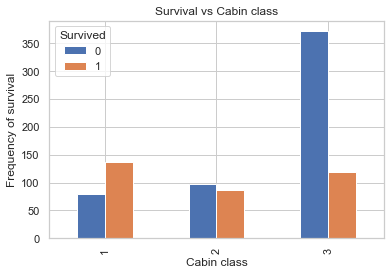

In [14]:
%matplotlib inline
pd.crosstab(traindf.Pclass,traindf.Survived).plot(kind='bar')
plt.title('Survival vs Cabin class')
plt.xlabel('Cabin class')
plt.ylabel('Frequency of survival')
#plt.savefig('surv_vs_class')

Text(0, 0.5, 'Frequency of survival')

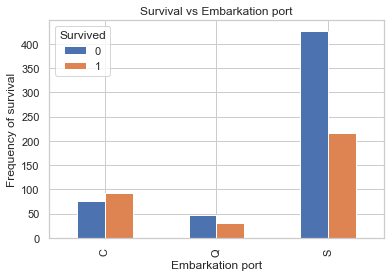

In [15]:
%matplotlib inline
pd.crosstab(traindf.Embarked,traindf.Survived).plot(kind='bar')
plt.title('Survival vs Embarkation port')
plt.xlabel('Embarkation port')
plt.ylabel('Frequency of survival')
#plt.savefig('surv_vs_class')

These analyses seem to be rather dubious. It seems at first look that people embarking at southampton are more likely to dies than at Q, but if we do a normalization it might not look so striking after all.

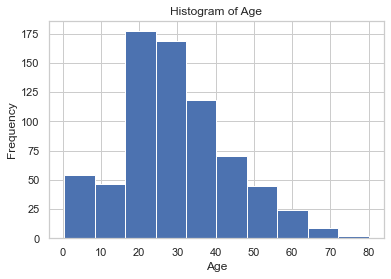

In [16]:
traindf.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

# Logistic regression

In [30]:
X = traindf.loc[:, traindf.columns != 'Survived']
y = traindf.loc[:, traindf.columns == 'Survived']

In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'